# Исследование данных выставленных на аукцион американских автомобилей
Датасет можно найти тут: https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('USA_cars_datasets.csv')
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Пропусков нет

In [ ]:
df['brand'] = df['brand'].astype(str)
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


Среднее значение цены чуть выше медианного, что может быть связано с удешевлением производства по сравнению с 1973 годом.

Средний год выпуска близок к медиане и оба они не так далеки от "современного" 2020 - связано это может с тем, что больше людей покупают новые машины

Средний "километраж" (на самом деле миллиаж) сильно отличается от медианного, скорее всего старые машины проехали уже очень много километров по американским шоссе, а новые в свою очередь ещё не успели этого сделать

# Выбросы
Проверим по межквартильному размаху


Для переменной price:
  Межквартильный размах (IQR): 15355.5
  Количество выбросов: 64
  Max: 84900

  Min: 49000

  Выбросы: price
49000    8
55000    4
50000    3
53000    3
54500    3
49500    3
53500    2
54000    2
50500    2
52000    2
56500    2
58500    2
59975    2
63000    2
56200    1
60000    1
49900    1
51000    1
60200    1
74000    1
50200    1
59900    1
57700    1
56700    1
70000    1
65200    1
54900    1
65500    1
63200    1
62000    1
84900    1
55600    1
51502    1
61200    1
54680    1
50412    1
67000    1
56000    1
Name: count, dtype: int64

Для переменной year:
  Межквартильный размах (IQR): 3.0
  Количество выбросов: 126
  Max: 2011

  Min: 1973

  Выбросы: year
2011    23
2008    18
2010    13
2009    11
2003     9
2006     8
2005     6
2007     6
2004     6
2001     5
2000     4
1998     4
2002     2
1994     2
1997     2
1996     2
1973     1
1999     1
1984     1
1995     1
1993     1
Name: count, dtype: int64

Для переменной mileage:
  Межквартильный

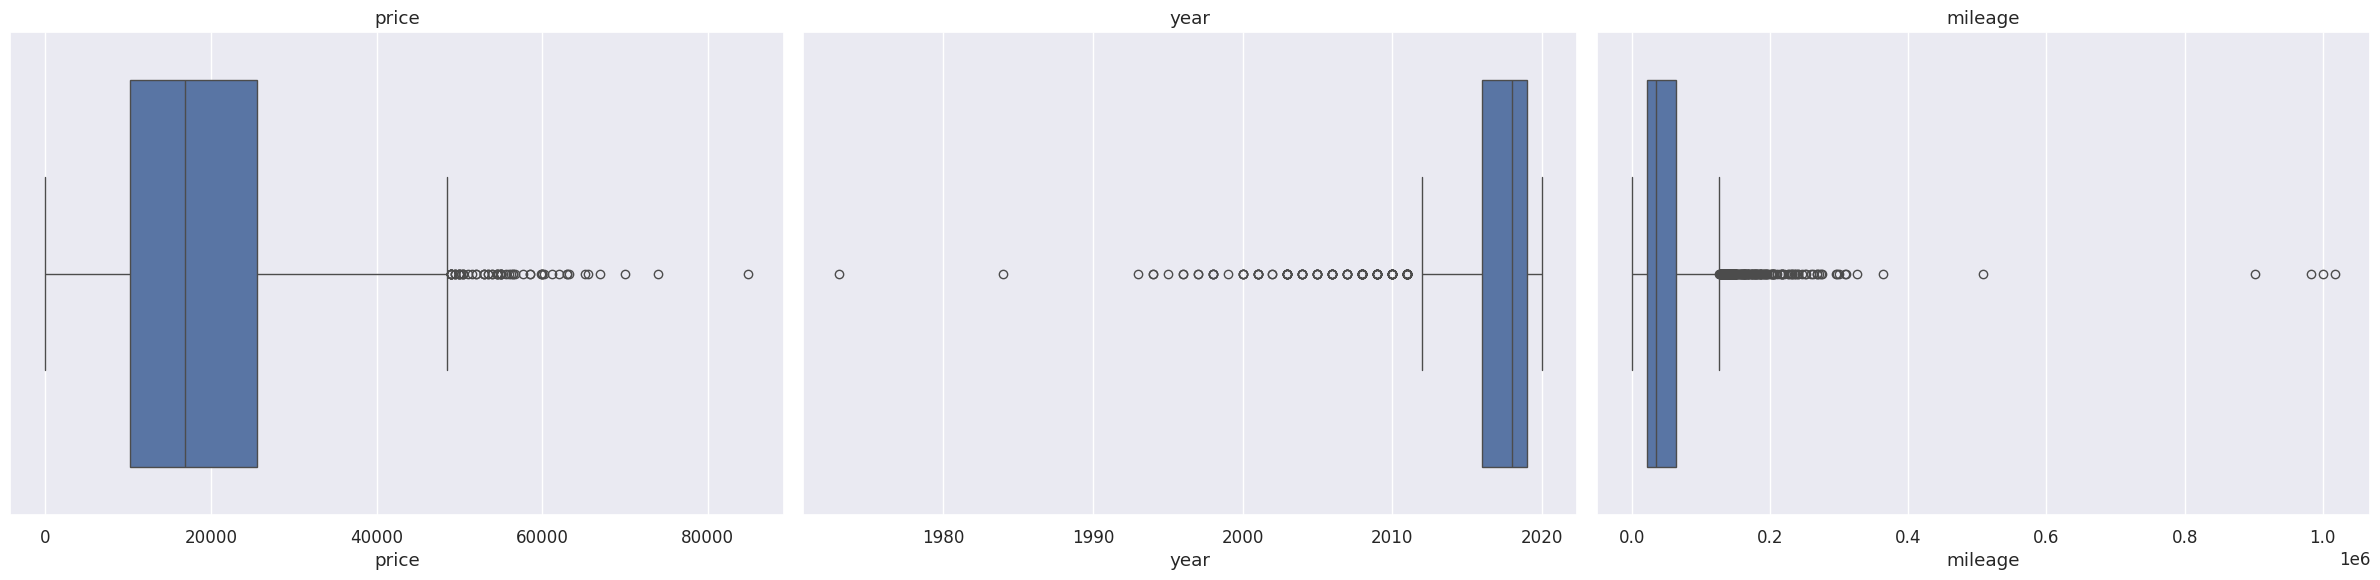

In [ ]:
keys = ['price', 'year', 'mileage']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 6)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    # Рисуем боксплот
    sns.boxplot(x=df[key], ax=ax)

    # Вычисляем межквартильный размах (IQR)
    Q1 = df[key].quantile(0.25)
    Q3 = df[key].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем выбросы
    outliers = df[(df[key] < (Q1 - 1.5 * IQR)) | (df[key] > (Q3 + 1.5 * IQR))][key]

    # Выводим информацию о межквартильном размахе и выбросах
    print(f"Для переменной {key}:")
    print(f"  Межквартильный размах (IQR): {IQR}")
    print(f"  Количество выбросов: {len(outliers)}")
    print(f"  Max: {max(outliers)}\n")
    print(f"  Min: {min(outliers)}\n")
    print(f"  Выбросы: {outliers.value_counts()}\n")


    ax.set_title(key)

plt.tight_layout()
plt.show()

Выбросы происходят только по одну сторону от боксплота.

В цене нет удивилетльных цифр кроме 0, однако он входит с межквартильный размах, будем считать что кто то очень сильно хотел избавиться от машины.

В году тоже нет ничего удивительного, все значения вблизи медианы и поэтому всё до 2011 считается выбросом, однако 2 машины по сравнению с оставшимися очень стары, до 1990 года. Будем исследовать от 1990, поэтому отбросим их.

А вот в километраже видим 4 машины, которые проехали около миллиона миль, отбросим их, они и так своё отвоевали

In [ ]:
df = df[(df['mileage'] < 600000) & (df['year'] > 1990)]

#Проверим распределение численных данных на нормальность
Визуальный анализ

Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Мы можем видеть, что серьёзные выводы можно сделать только относительно распределения параметров year и milliage - они распределены точно не нормально.

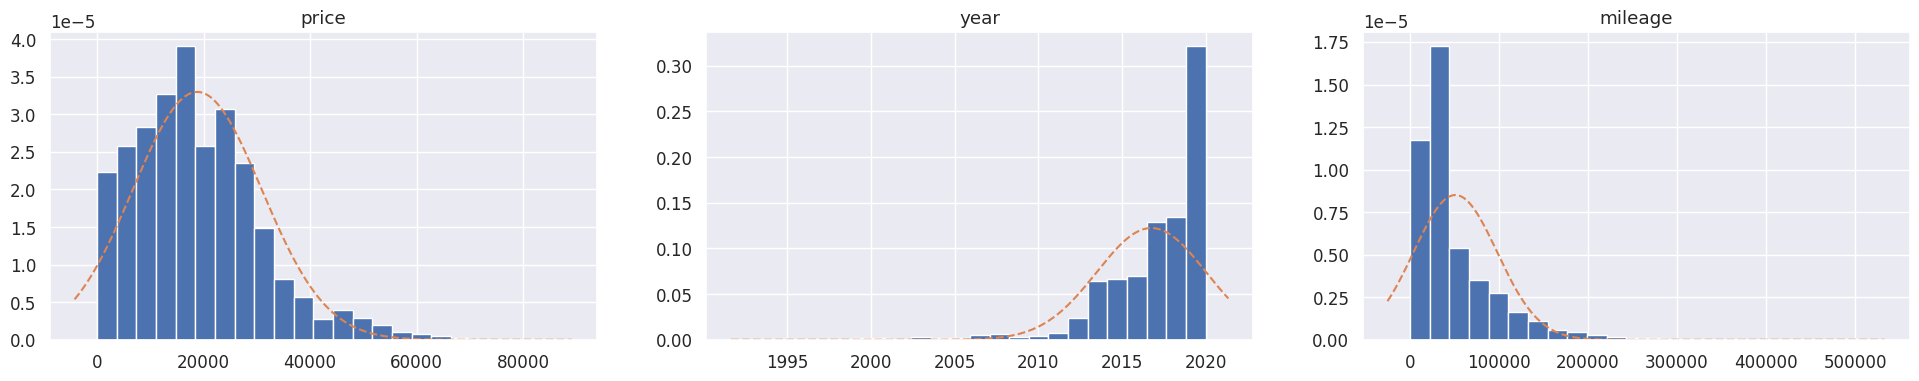

In [ ]:
keys = ['price', 'year', 'mileage']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближке график к графику
, тем более нормальным является распределение значений выборки.

Как мы и говорили ранее year не является распределённым нормально. Тогда как price распределён относительно нормально. А вот про milliage и в этом случае говорить трудно, сильно выбиваются крайние точки

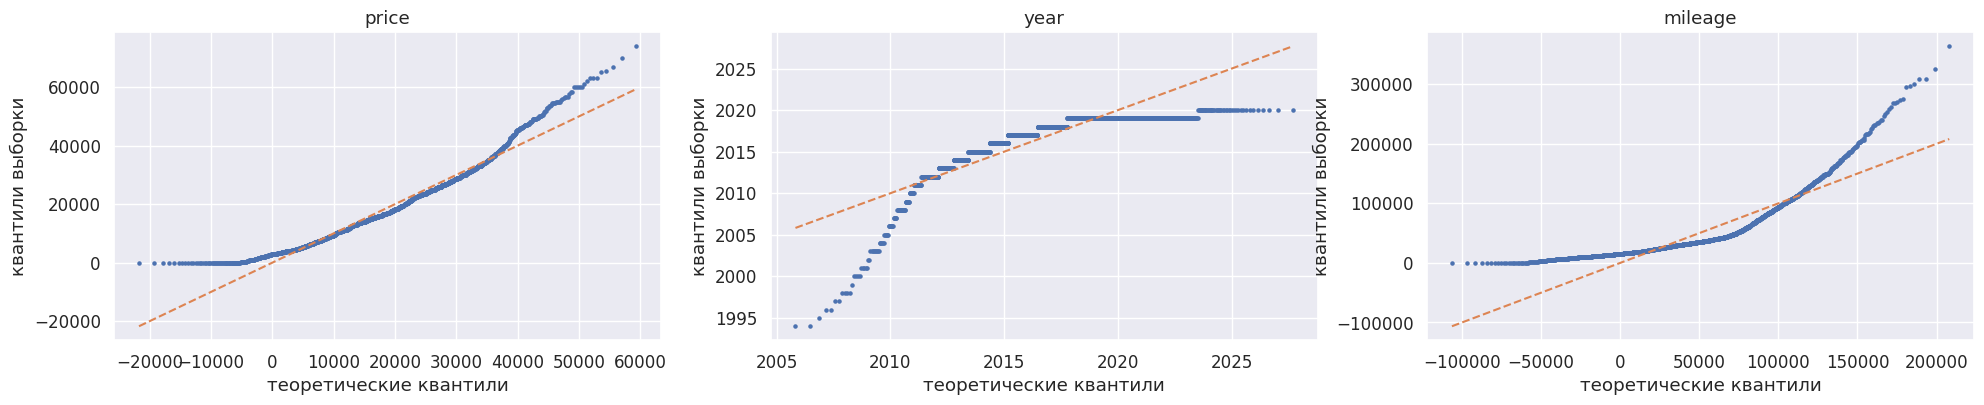

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Стастические показатели для выборок

Оценим нормальность выборок также на основании известных характеристик нормального распределения.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

Можем окончательно убедиться, что распределение относительно нормально только у price, в свою очередь у milliage и year - нет, довольно логично, ведь с каждым годом производят всё больше машин, а километраж старых только растет

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7023666265543522
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9526674689129563
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9899719213798637

year
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8884877657440834
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9602888086642599
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9787404733253109

mileage
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8459687123947052
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9490573606097071
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9803449659045327



# Регрессия между годом и километражом

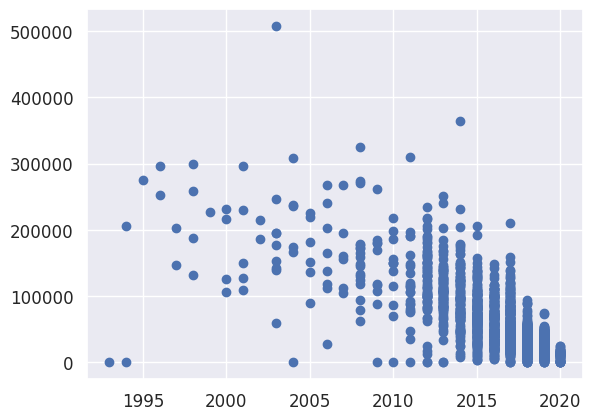

In [ ]:
plt.scatter(df['year'], df['mileage'])
plt.show()

По визуальному анализу можно сказать, что более старые машины имеют больше пробега, но и с большей дисперсией, чем новые. Так как данные распределены не нормально, используем коэффициент корреляции Кендала. Обратная зависимость наблюдается, хоть и не сильно выражена

Проверим нулевую гипотезу о том, что между переменными нет корреляции, для этого посчитаем p-характеристику. Получаем, что корреляция статистически значима, и действительно более новые машины имеют меньший пробег

In [ ]:
from scipy.stats import kendalltau
corr, p_value = kendalltau(df['year'], df['mileage'])

# Вывод результатов
print(f"Коэффициент корреляции Кендала: {corr}")
print(f"p-value: {p_value}")

# Проверка нулевой гипотезы
alpha = 0.05
if p_value < alpha:
    print("Корреляция статистически значима (отвергаем H0).")
else:
    print("Корреляция незначима (не отвергаем H0).")

Коэффициент корреляции Кендала: -0.5644905727587852
p-value: 0.0
Корреляция статистически значима (отвергаем H0).


# Верно ли, что цена черного автомобиля отличается от других?

Посмотрим распределения цены в зависимости от их марки. Оказалось и вправду люди готовы больше платить на черный цвет машины

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t


df1 = df[(df['color'] == 'black')]
df2 = df[(df['color'] != 'black')]


var_analise(df, df1, df2, 'price')

True

In [ ]:
res1_mean = df1['price'].mean()
res2_mean = df2['price'].mean()

print(f'black: {res1_mean}, other {res2_mean}')

black: 20289.53488372093, other 18409.95751138088


#Верно ли, что у старых автомобилей ford больше пробега?
Посмотрим распределения километража на относительно старых машинах (до 2013 года) в зависимости от их марки. Оказалось и вправду владельцы старых фордов используют свои ласточки по полной. Проверим выборки, вдруг там затесалось много машин с малым пробегом (новые)

In [ ]:
df1 = df[(df['brand'] == 'ford') & (df['year']<=2013)]
df2 = df[(df['brand'] != 'ford')& (df['year']<=2013)]


var_analise(df, df1, df2, 'mileage')

True

In [ ]:
res1_mean = df1['mileage'].mean()
res2_mean = df2['mileage'].mean()

print(f'ford: {res1_mean}, other world {res2_mean}')

ford: 135130.57142857142, other world 133849.71710526315


In [ ]:
print(sorted(df1['mileage'].values))
print(sorted(df2['mileage'].values))

[0.0, 0.0, 703.0, 11990.0, 24581.0, 26914.0, 48408.0, 54380.0, 58817.0, 58913.0, 62015.0, 64598.0, 67140.0, 70106.0, 74195.0, 76897.0, 77281.0, 78072.0, 80090.0, 82072.0, 82564.0, 82670.0, 83030.0, 84752.0, 86841.0, 88781.0, 89490.0, 90711.0, 91652.0, 93698.0, 94004.0, 95386.0, 95655.0, 98470.0, 98620.0, 100264.0, 100757.0, 101848.0, 102705.0, 103541.0, 104559.0, 104764.0, 105510.0, 105743.0, 105880.0, 109600.0, 109672.0, 110748.0, 111532.0, 113444.0, 113821.0, 114500.0, 115241.0, 115429.0, 116480.0, 118593.0, 119869.0, 122014.0, 122861.0, 123983.0, 124969.0, 125451.0, 126381.0, 128753.0, 129659.0, 129873.0, 131101.0, 131367.0, 132379.0, 133314.0, 135077.0, 136661.0, 137171.0, 138328.0, 138524.0, 140870.0, 142027.0, 143191.0, 145483.0, 146807.0, 146912.0, 149346.0, 149712.0, 151035.0, 151641.0, 154989.0, 155242.0, 158781.0, 163334.0, 167011.0, 167376.0, 167552.0, 173601.0, 175640.0, 176567.0, 180364.0, 180471.0, 181316.0, 184889.0, 185983.0, 186713.0, 186855.0, 188394.0, 189776.0, 1905

Малых значений по оставшимся маркам не сильно больше, чем у ford, можем считать результат достоверным

#Влияет ли бренд на цену машины?
Проведём анализ зависимости оценки от качественного фактора "брэнд". Для этого разобъём нашу таблицу на дамми переменные по брэндам. Построим матрицу корелляции.

Затем проведём дисперсионный анализ для всех пар выборок и построим график разброса результата. Можно однозначно сказать, что в большинстве случае брэнд не влияет на оценку (синие точки), и в меньшестве случаев (красные точки) брэнд статистически на оценку влияет.

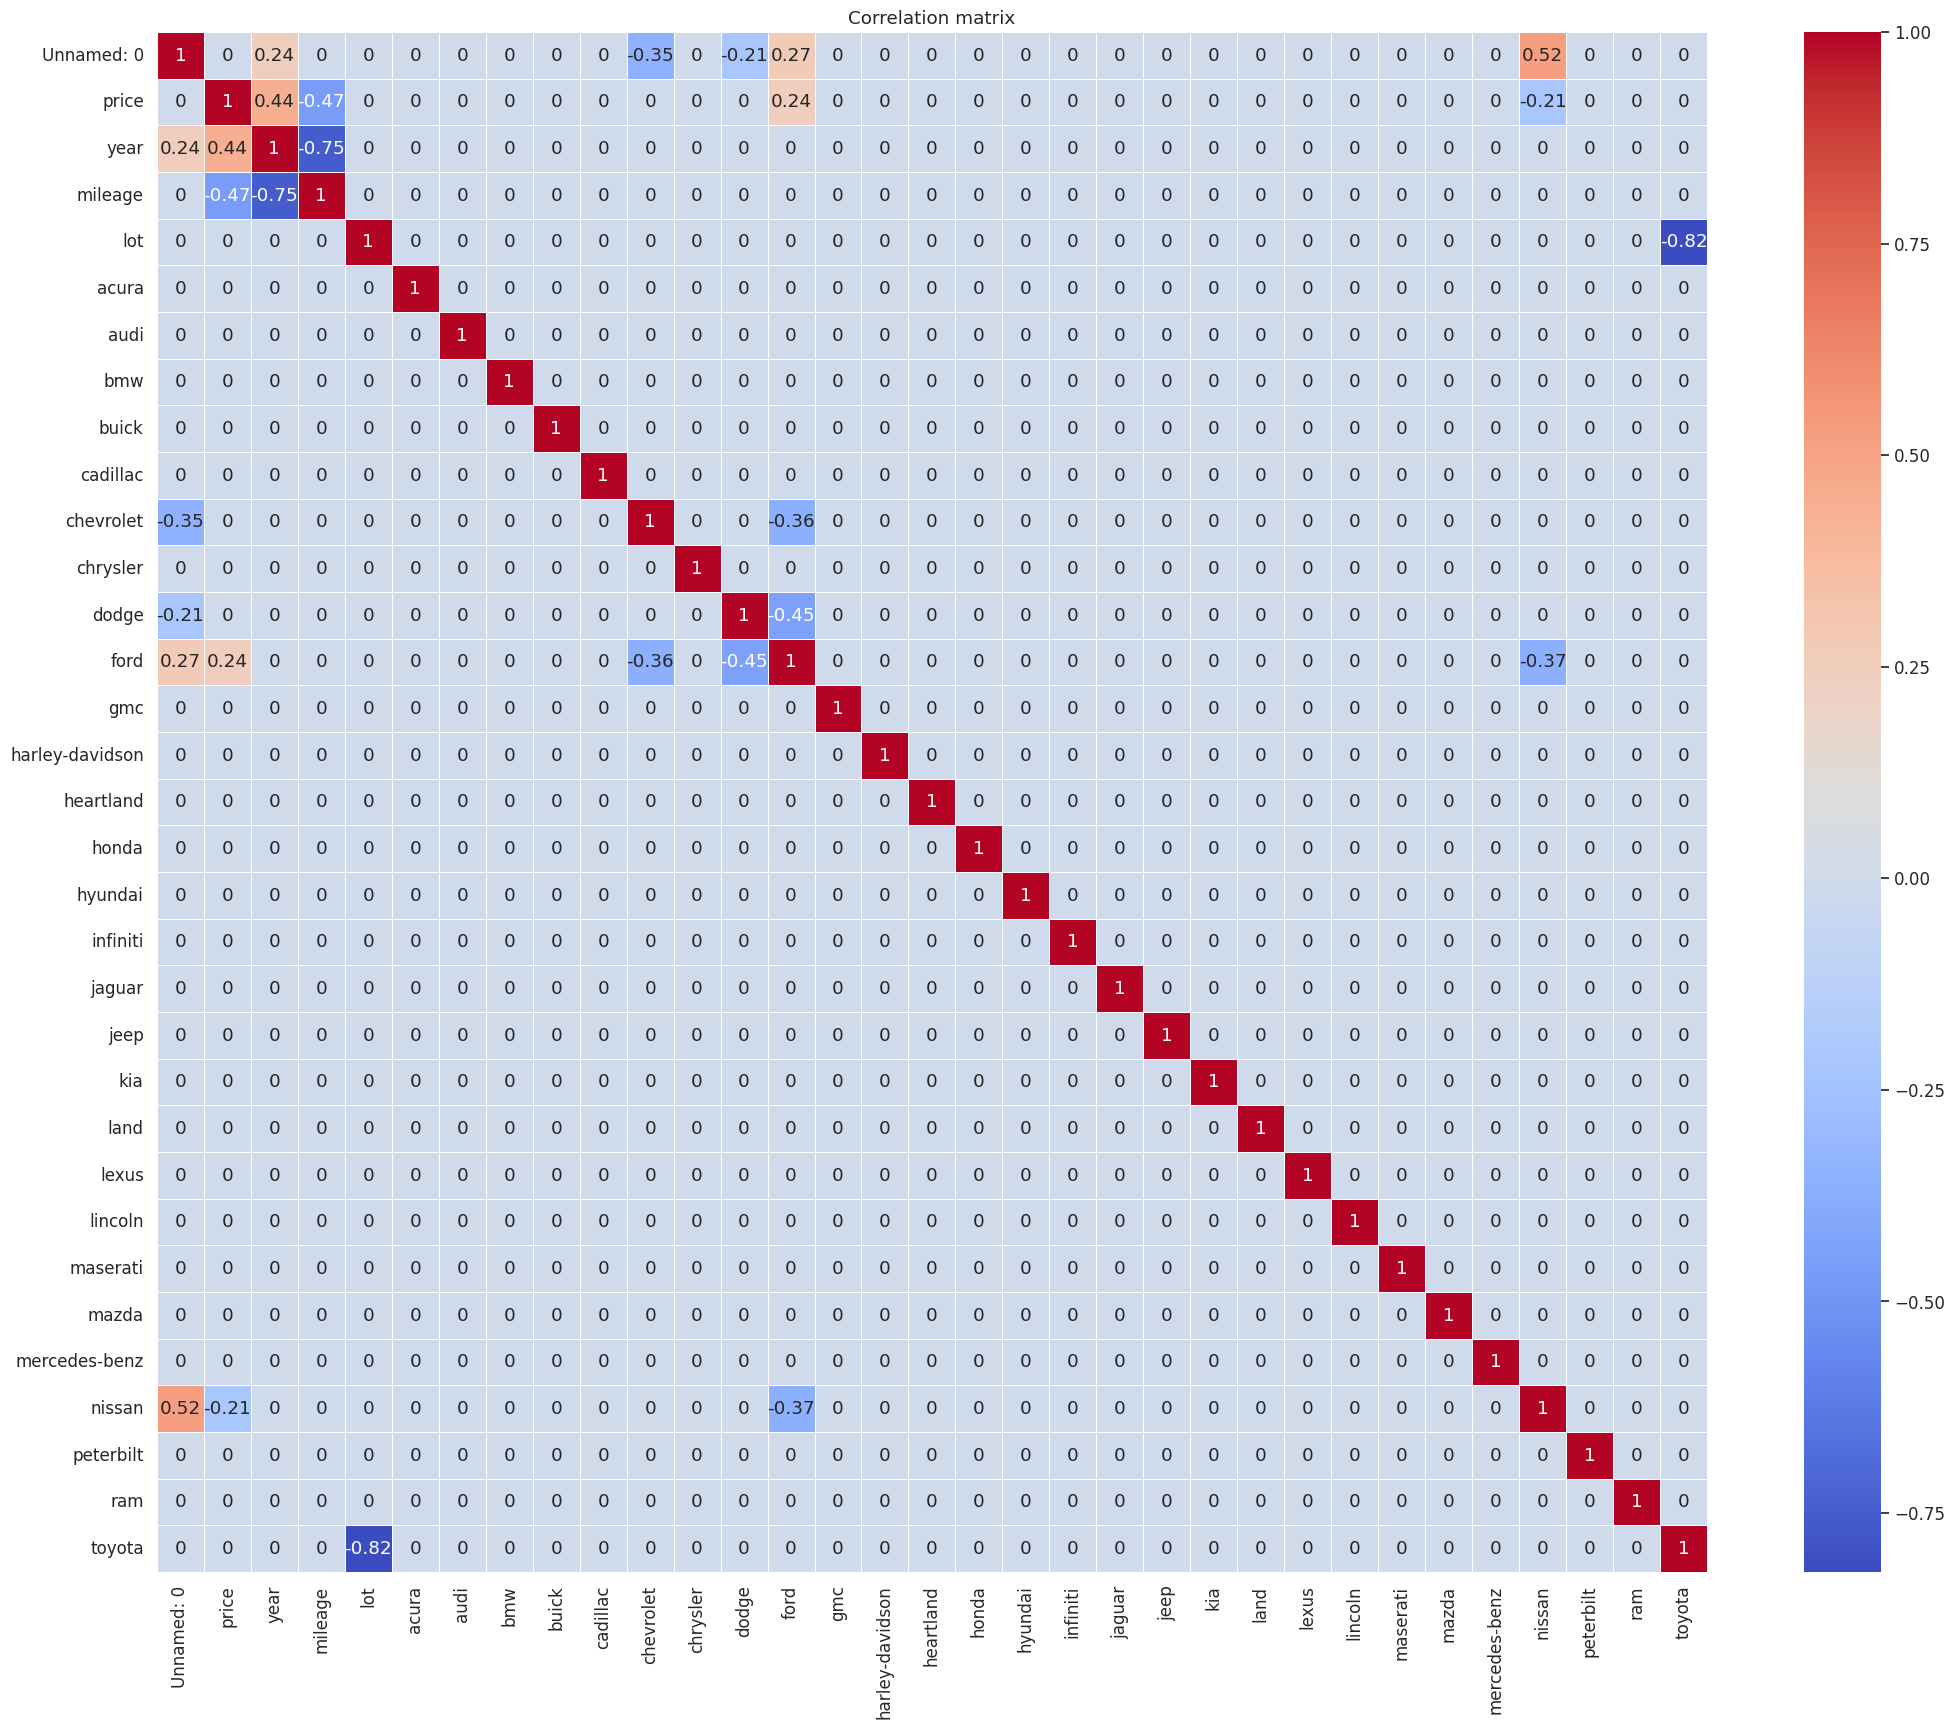

In [ ]:
separated_brands = df['brand'].str.get_dummies(',')
dataset_with_brands = pd.concat([df, separated_brands], axis = 1, sort = False)

list_of_brands = separated_brands.columns

plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_brands.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Отсекаем маленькие корелляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
from itertools import *
list_of_res = []
for i in combinations(list_of_brands, 2):
  #print(i)
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_brands[[i[0], i[1], 'price']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]

  dict['va'] = var_analise(wdf, wdf1, wdf2, 'price')
  dict['g1_mean'] = wdf1['price'].mean()
  dict['g2_mean'] = wdf2['price'].mean()
  list_of_res.append(dict)


resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: invalid value encountered in scalar divide
  sigma2_w = SS_w / k2
<ipython-input-63-ac2650be3b8c>:15: RuntimeWarning: inva

,g1,g2,va,g1_mean,g2_mean
0,acura,audi,False,7266.666667,13981.250000
1,acura,bmw,False,7266.666667,26397.058824
2,acura,buick,False,7266.666667,19715.769231
4,acura,chevrolet,False,7266.666667,18632.351351
5,acura,chrysler,False,7266.666667,13686.111111
...,...,...,...,...,...
373,nissan,ram,False,12065.820513,11050.000000
374,nissan,toyota,False,12065.820513,6300.000000
375,peterbilt,ram,False,100.000000,11050.000000
376,peterbilt,toyota,False,100.000000,6300.000000


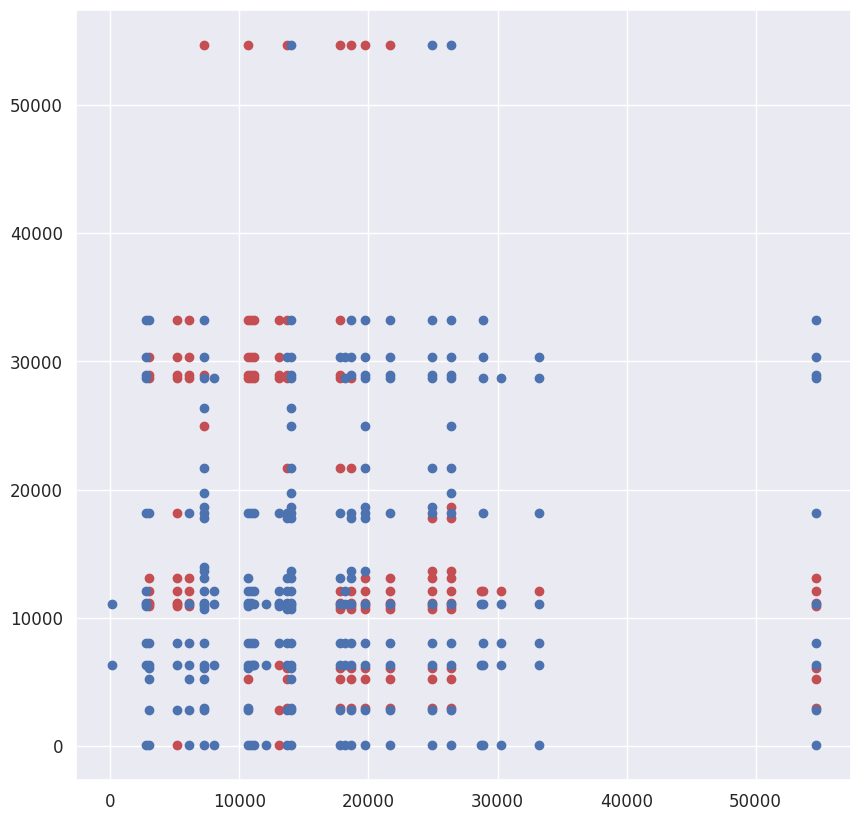

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')


#Вывод
Цена в датасете распределена нормально. Это позволяет провести дисперсионный анализ различных закономерностей и выявить, что за черные машины люди готовы отдавать больше денег, чем за остальные

Однако на цену автомобиля бренд с меньшенстве случаев оказывает влияние, видимо люди чаще выбирают машину исключительно по её характеристикам

Форд и вправду выделяется своей надежностью относительно других машин, статистически пробег на машинах до 2013 года выше, чем у остальных машин

Ну и убедились, что пробег и год выпуска автомобилей связаны. Да, машины эксплуатируют